In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import axis as ax
from gsw import SA_from_SP, CT_from_t, rho, p_from_z, spiciness0
%matplotlib inline

In [2]:
## This is just longfin squid
nefsc_count = pd.read_csv("Data/22561_NEFSCSpringFisheriesIndependentBottomTrawlData/22561_UNION_FSCS_SVCAT.csv").groupby("SVSPP").get_group(503)
nefsc_ocean = pd.read_csv("Data/22561_NEFSCSpringFisheriesIndependentBottomTrawlData/22561_UNION_FSCS_SVSTA.csv")

/var/folders/1m/h30kdd551mzgc1v42hlv1v9w0000gn/T/ipykernel_5209/2714920041.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  nefsc_count = pd.read_csv("Data/22561_NEFSCSpringFisheriesIndependentBottomTrawlData/22561_UNION_FSCS_SVCAT.csv").groupby("SVSPP").get_group(503)


In [3]:
nefsc_count = nefsc_count.drop(columns=["CRUISE6","CRUISE","SVSPP",'STRATUM','TOW','STATION','STATUS_CODE','SCIENTIFIC_NAME','CATCH_COMMENT'])

In [4]:
nefsc_count = nefsc_count.rename(columns = {"CATCHSEX" :"sex", "EXPCATCHNUM":"squid", "EXPCATCHWT":"weight"})
nefsc_count['squid1'] = np.where(nefsc_count['squid'] >= 1.0,1,0).astype(int)

In [5]:
nefsc_count

,ID,sex,squid,weight,squid1
326,196803016100010034,0,1.0,0.000,1
337,196803016200010035,0,498.0,7.300,1
357,196803016300010037,0,1872.0,72.600,1
399,196803016800010041,0,25.0,1.400,1
414,196803016700010042,0,1757.0,91.200,1
...,...,...,...,...,...
285582,202402034600040777,0,902.0,10.877,1
285602,202402010600030779,0,2.0,0.017,1
285629,202402010400040781,0,1.0,0.013,1
285649,202402010200040783,0,70.0,2.166,1


In [6]:
nefsc_ocean

,CRUISE6,CRUISE,STRATUM,TOW,STATION,STATUS_CODE,ID,START_DATE,END_DATE,year,...,WINDSP,WEATHER,WAVEHGT,SWELLDIR,SWELLHGT,XBT,TEMPSURF,SALSURF,TEMPBOT,SASLBOT
0,196803,6803,1050,3,1,10,196803010500030001,3/6/68 20:02,3/6/68 20:32,1968.0,...,10.0,NaN,0.6,NaN,NaN,3,2.3,NaN,2.9,NaN
1,196803,6803,1050,4,2,10,196803010500040002,3/6/68 22:08,3/6/68 22:38,1968.0,...,15.0,NaN,0.9,NaN,NaN,3,2.4,NaN,2.3,NaN
2,196803,6803,1090,1,3,10,196803010900010003,3/7/68 0:23,3/7/68 0:53,1968.0,...,14.0,NaN,0.9,NaN,NaN,3,2.0,NaN,2.4,NaN
3,196803,6803,1060,6,4,10,196803010600060004,3/7/68 4:35,3/7/68 5:05,1968.0,...,16.0,NaN,0.9,NaN,NaN,3,2.8,NaN,NaN,NaN
4,196803,6803,1060,5,5,10,196803010600050005,3/7/68 8:00,3/7/68 8:30,1968.0,...,12.0,NaN,0.9,NaN,NaN,3,3.0,NaN,6.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20275,202402,202402,3460,4,777,10,202402034600040777,5/12/24 12:30,5/12/24 12:50,2024.0,...,13.6,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN
20276,202402,202402,1060,3,779,10,202402010600030779,5/12/24 18:45,5/12/24 19:05,2024.0,...,4.6,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN
20277,202402,202402,1040,4,781,10,202402010400040781,5/13/24 1:19,5/13/24 1:39,2024.0,...,3.8,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN
20278,202402,202402,1020,4,783,10,202402010200040783,5/13/24 3:42,5/13/24 4:02,2024.0,...,10.0,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN


In [7]:
print(nefsc_ocean['ID'].dtype)
print(nefsc_count['ID'].dtype)

int64
int64


In [8]:
nefsc_full = pd.merge(nefsc_ocean,nefsc_count,on="ID", how='left').sort_index()

In [9]:
nefsc_full

,CRUISE6,CRUISE,STRATUM,TOW,STATION,STATUS_CODE,ID,START_DATE,END_DATE,year,...,SWELLHGT,XBT,TEMPSURF,SALSURF,TEMPBOT,SASLBOT,sex,squid,weight,squid1
0,196803,6803,1050,3,1,10,196803010500030001,3/6/68 20:02,3/6/68 20:32,1968.0,...,NaN,3,2.3,NaN,2.9,NaN,NaN,NaN,NaN,NaN
1,196803,6803,1050,4,2,10,196803010500040002,3/6/68 22:08,3/6/68 22:38,1968.0,...,NaN,3,2.4,NaN,2.3,NaN,NaN,NaN,NaN,NaN
2,196803,6803,1090,1,3,10,196803010900010003,3/7/68 0:23,3/7/68 0:53,1968.0,...,NaN,3,2.0,NaN,2.4,NaN,NaN,NaN,NaN,NaN
3,196803,6803,1060,6,4,10,196803010600060004,3/7/68 4:35,3/7/68 5:05,1968.0,...,NaN,3,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,196803,6803,1060,5,5,10,196803010600050005,3/7/68 8:00,3/7/68 8:30,1968.0,...,NaN,3,3.0,NaN,6.3,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20276,202402,202402,3460,4,777,10,202402034600040777,5/12/24 12:30,5/12/24 12:50,2024.0,...,NaN,,NaN,NaN,NaN,NaN,0.0,902.0,10.877,1.0
20277,202402,202402,1060,3,779,10,202402010600030779,5/12/24 18:45,5/12/24 19:05,2024.0,...,NaN,,NaN,NaN,NaN,NaN,0.0,2.0,0.017,1.0
20278,202402,202402,1040,4,781,10,202402010400040781,5/13/24 1:19,5/13/24 1:39,2024.0,...,NaN,,NaN,NaN,NaN,NaN,0.0,1.0,0.013,1.0
20279,202402,202402,1020,4,783,10,202402010200040783,5/13/24 3:42,5/13/24 4:02,2024.0,...,NaN,,NaN,NaN,NaN,NaN,0.0,70.0,2.166,1.0


In [10]:
# Dropping years 1968-2008 to match NEAMAP  
drops = np.arange(1968,2008)
df2 = nefsc_full.set_index('year')
nefsc = df2.drop(drops)

In [16]:
nefsc['DOY']=pd.to_datetime(nefsc.START_DATE, format='%m/%d/%y %H:%M', errors='coerce').dt.dayofyear

In [17]:
bad_dates = nefsc[pd.to_datetime(nefsc['START_DATE'], format='%m/%d/%y %H:%M', errors='coerce').isna()]
print(bad_dates['START_DATE'])

year
NaN    NaN
NaN    NaN
NaN    NaN
NaN    NaN
NaN    NaN
      ... 
NaN    NaN
NaN    NaN
NaN    NaN
NaN    NaN
NaN    NaN
Name: START_DATE, Length: 67, dtype: object


In [12]:
nefsc.update(nefsc[[ "squid", "weight", "squid1"]].fillna(0))

In [13]:
nefsc.groupby('year')['squid'].mean()

year
2008.0    105.892442
2009.0    156.383028
2010.0    105.612903
2011.0    126.507853
2012.0    568.518041
2013.0    101.581683
2014.0    106.729032
2015.0    141.379397
2016.0    316.736000
2017.0    207.892105
2018.0    217.748148
2019.0    274.212987
2020.0    547.278571
2021.0    101.055385
2022.0    434.013333
2023.0     80.376623
2024.0    308.863517
Name: squid, dtype: float64

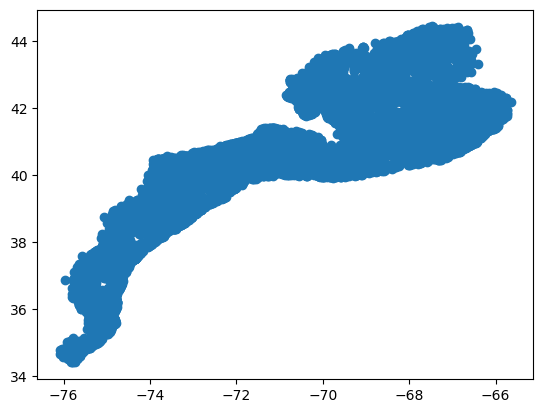

In [14]:
plt.scatter(nefsc["SLONG"],nefsc['SLAT'])

In [15]:
nefsc.to_csv("Data/nefsc_longfin.csv")